In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Download monthly data for Yangtze Power (600900.SS)
symbol = '0700.hk'
name = 'Tencent'
data = yf.download(symbol, interval='1mo', start='1980-01-01')

[*********************100%***********************]  1 of 1 completed


In [14]:
print(data.head())

Price          Close      High       Low      Open      Volume
Ticker       0700.HK   0700.HK   0700.HK   0700.HK     0700.HK
Date                                                          
2004-06-01  0.745225  0.801551  0.684567  0.758224  3991876934
2004-07-01  0.667237  0.771222  0.584915  0.745225  1144248100
2004-08-01  0.636908  0.701898  0.584916  0.667237   532151714
2004-09-01  0.658571  0.688900  0.597913  0.636908   450780583
2004-10-01  0.797217  0.831880  0.658571  0.658571   937747024


In [15]:
# Calculate the moving averages
data['5_Month_MA'] = data['Close'].rolling(window=5).mean()
data['10_Month_MA'] = data['Close'].rolling(window=10).mean()
data['20_Month_MA'] = data['Close'].rolling(window=20).mean()
data['30_Month_MA'] = data['Close'].rolling(window=30).mean()
data['60_Month_MA'] = data['Close'].rolling(window=60).mean()
data['120_Month_MA'] = data['Close'].rolling(window=120).mean()
data['233_Month_MA'] = data['Close'].rolling(window=233).mean()

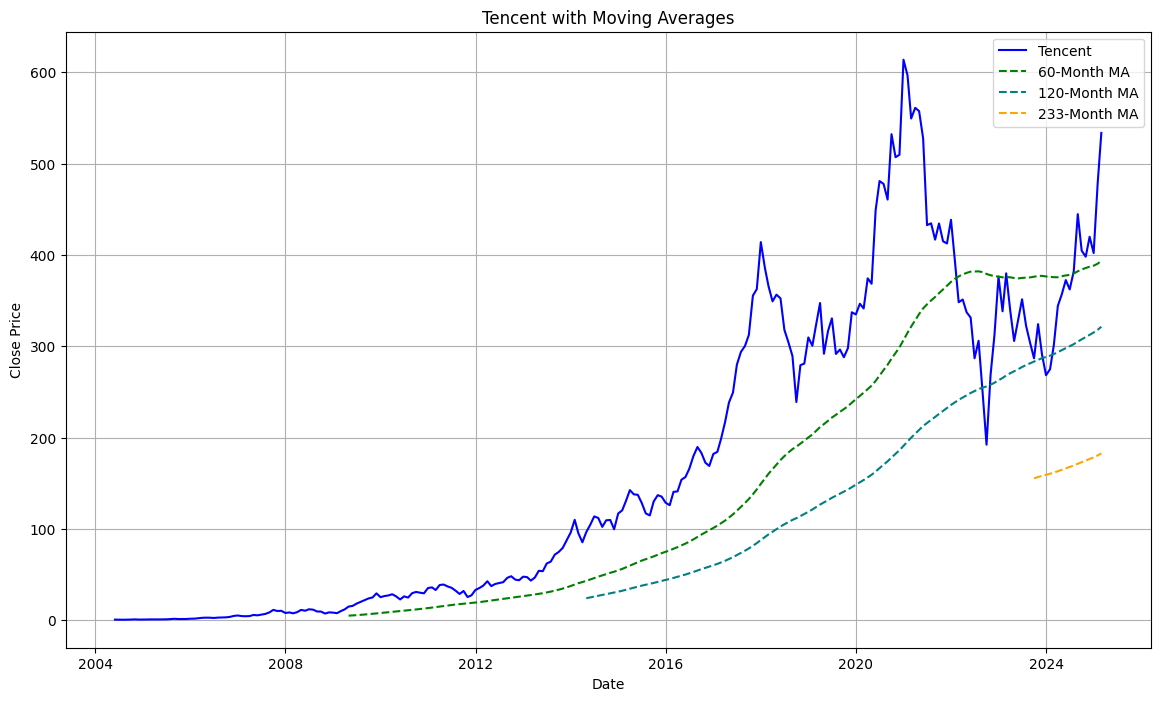

In [16]:
# Plot the closing price and moving averages
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label=name, color='blue')
#plt.plot(data['5_Month_MA'], label='5-Month MA', color='red', linestyle='--')
#plt.plot(data['10_Month_MA'], label='10-Month MA', color='purple', linestyle='--')
#plt.plot(data['20_Month_MA'], label='20-Month MA', color='brown', linestyle='--')
#plt.plot(data['30_Month_MA'], label='30-Month MA', color='pink', linestyle='--')
plt.plot(data['60_Month_MA'], label='60-Month MA', color='green', linestyle='--')
plt.plot(data['120_Month_MA'], label='120-Month MA', color='teal', linestyle='--')
plt.plot(data['233_Month_MA'], label='233-Month MA', color='orange', linestyle='--')

# Adding labels and title
plt.title(f'{name} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [17]:
# Calculate the monthly difference of the moving averages
data['5_Month_MA_Slope'] = data['5_Month_MA'].diff()
data['10_Month_MA_Slope'] = data['10_Month_MA'].diff()
data['20_Month_MA_Slope'] = data['20_Month_MA'].diff()
data['30_Month_MA_Slope'] = data['30_Month_MA'].diff()
data['60_Month_MA_Slope'] = data['60_Month_MA'].diff()
data['120_Month_MA_Slope'] = data['120_Month_MA'].diff()
data['233_Month_MA_Slope'] = data['233_Month_MA'].diff()

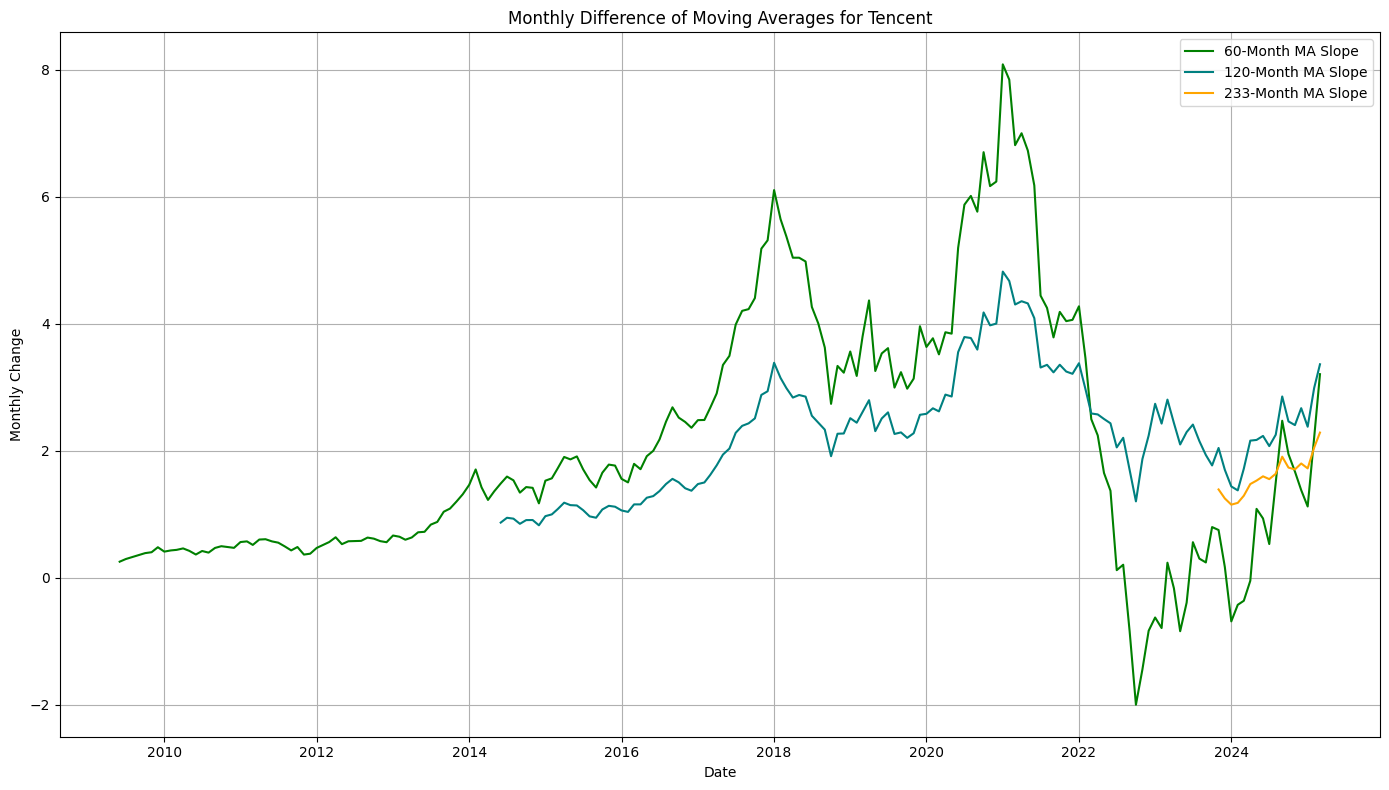

In [18]:
# Plot the rate of change (slope) of the moving averages
plt.figure(figsize=(14, 8))
#plt.plot(data['5_Month_MA_Slope'], label='5-Month MA Slope', color='red', linestyle='-')
#plt.plot(data['10_Month_MA_Slope'], label='10-Month MA Slope', color='purple', linestyle='-')
#plt.plot(data['20_Month_MA_Slope'], label='20-Month MA Slope', color='brown', linestyle='-')
#plt.plot(data['30_Month_MA_Slope'], label='30-Month MA Slope', color='pink', linestyle='-')
plt.plot(data['60_Month_MA_Slope'], label='60-Month MA Slope', color='green', linestyle='-')
plt.plot(data['120_Month_MA_Slope'], label='120-Month MA Slope', color='teal', linestyle='-')
plt.plot(data['233_Month_MA_Slope'], label='233-Month MA Slope', color='orange', linestyle='-')

# Adding labels and title
plt.title(f'Monthly Difference of Moving Averages for {name}')
plt.xlabel('Date')
plt.ylabel('Monthly Change')
plt.legend()
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [19]:
# Calculate the percentage change of the moving averages
data['5_Month_MA_Percent_Change'] = data['5_Month_MA'].pct_change() * 100
data['10_Month_MA_Percent_Change'] = data['10_Month_MA'].pct_change() * 100
data['20_Month_MA_Percent_Change'] = data['20_Month_MA'].pct_change() * 100
data['30_Month_MA_Percent_Change'] = data['30_Month_MA'].pct_change() * 100
data['60_Month_MA_Percent_Change'] = data['60_Month_MA'].pct_change() * 100
data['120_Month_MA_Percent_Change'] = data['120_Month_MA'].pct_change() * 100
data['233_Month_MA_Percent_Change'] = data['233_Month_MA'].pct_change() * 100

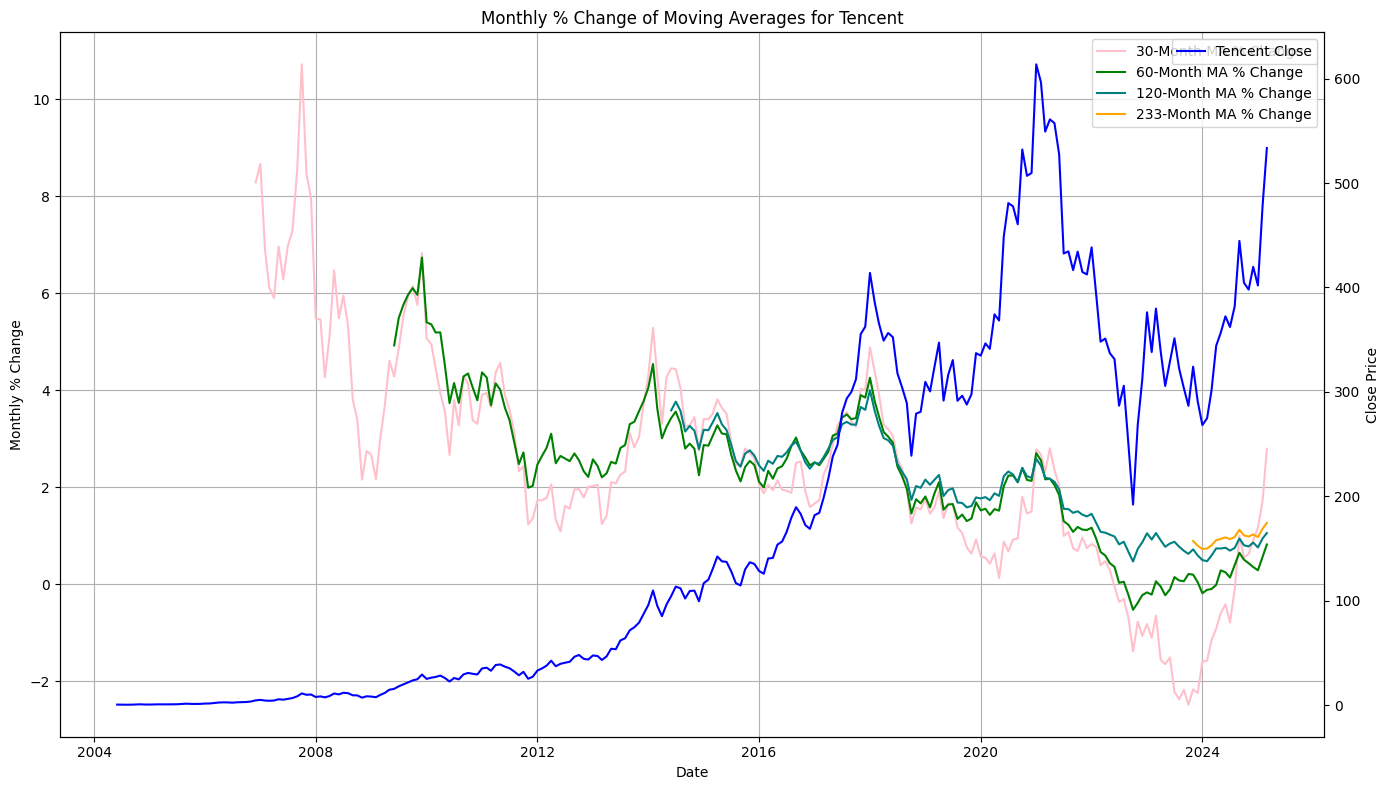

In [25]:
# Plot the rate of change (slope) of the moving averages
plt.figure(figsize=(14, 8))
#plt.plot(data['5_Month_MA_Percent_Change'], label='5-Month MA % Change', color='red', linestyle='-')
#plt.plot(data['10_Month_MA_Percent_Change'], label='10-Month MA % Change', color='purple', linestyle='-')
#plt.plot(data['20_Month_MA_Percent_Change'], label='20-Month MA % Change', color='brown', linestyle='-')
plt.plot(data['30_Month_MA_Percent_Change'], label='30-Month MA % Change', color='pink', linestyle='-')
plt.plot(data['60_Month_MA_Percent_Change'], label='60-Month MA % Change', color='green', linestyle='-')
plt.plot(data['120_Month_MA_Percent_Change'], label='120-Month MA % Change', color='teal', linestyle='-')
plt.plot(data['233_Month_MA_Percent_Change'], label='233-Month MA % Change', color='orange', linestyle='-')

# Adding labels and title
plt.title(f'Monthly % Change of Moving Averages for {name}')
plt.xlabel('Date')
plt.ylabel('Monthly % Change')
plt.legend()
plt.grid(True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Plot the 'Close' data on the secondary y-axis
ax2.plot(data['Close'], label=f'{name} Close', color='blue')

# Set the label for the secondary y-axis
ax2.set_ylabel('Close Price')

# Add legend for the secondary y-axis
ax2.legend(loc='upper right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [24]:
data.to_csv(f"results/{name}.csv")